#### Problem Statement:
    Train a CNN model that classifies images of 'With mask' and 'Without mask'. Later use this model to detect whether faces are with mask or not that are captured in webcam.

##### Abstract:
    From past 1year we are facing COVID-19 pandemic all over the world. Many people got attacked by the deadly virus Corona. There are many precautions to be taken care of, to avoid getting attacked by this virus. Of them, wearing a mask is one of the most and major precaution to be taken care of. Because, air inhaled and exhaled is an easiest way of transmission, and also a mask will stop you from touching your nose or mouth after touching any kind of surface or a person that might lead virus to enter the body. But we can observe some people not wearing mask properly, which might result in rise of daily cases. So, by not wearing mask, they are not the only one at risk, but they are putting others life at risk. To identify such kind of people in public gathering and warn them to wear a mask or adjust their mask properly is not that easy thing for a human directly.

    My project is on the same, to detect people faces, wearing a mask or not. I'm going to run this project using my web cam here. This can be used in survillance cameras to monitor people who are not wearing mask and warn them immediately to put on. Of course in some places it is already in practice.

##### Description of project:
    Here, i've taken a dataset which contains 440 images. Of them, 220 images consists of people images with mask and rest of them contains images without mask.

    Here I'm using CNN image classification and Opencv concepts to perform this project.

    First, I'm going to train a model using convolutional neural networks of deep learning, for image classification to classify images with and without masks.

    Later, using harcascade code of detecting faces, I will be detecting faces of people with my web cam using Opencv library. By using the above CNN model here, we can identify faces with or without masks. 

###### Lets build CNN model
    For deep learning algorithms we use Keras library which uses tensorflow in backend.

In [2]:
# importing required libraries

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

 Sequential is a class in models package used to initialse Neural Network(NN) models

In [3]:
# initialise NN model

model=Sequential()

###### Add Convolutional Layer
    Group of Feature Maps ==> Convolutional layer.
    
    - When input image is convolued with a filter or feature detector, we get a resultant called Feature Map.
    
    - During Convolution process, size of image is reduced. So, we may lose some information, but feature detector will help to match and lets us to get main feature.
    
    -We apply multiple filters to a single image to extract features, which results multiple feature maps.

Types of filters --- Sharpen image,
                     Blur image,
                     Edge,
                     Emboss.

In [4]:
'''
"Hyper parameters"
*filters-- No. of Filters or Feature Detector
*kernal_size-- filter size
*strides-- No. of steps to move our filter
*input_shape-- Shape of input image(system should be capable of processing high pixel image)
               (100,100,1)-- (Height,Width,No. of channels)
'''
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(100,100,1)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(100,100,1)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(100,100,1)))

###### Add Pooling layer
    Max Pooling is used to 
    - Avoid overfitting while training (Model trained with same pixels multiple times)
    - Solve Spacial invariance(distortion) --- Same feature in different positions in diff images

    - Resultant of convolutional layer(Feature map) is the input for Pooling layer.
    - We select a pool size and from each pool, max pixel value is taken ==> Neighbor features are removed by retaining max pixel value which resolves overfitting.
    - As we are taking max of pixels, we are checking for distortion.
    - Resultant of pooling layer --- Pooled Feature Map.

In [5]:
# pool_size --- size of pool to extract max pixel value.

model.add(MaxPooling2D(pool_size=(2,2)))

In [6]:
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

###### Add Flatten layer
    Takes resultant of Pooling layer(pooled feature map) as input and flattens it(converts to 1D array).
    
    Resultant Flattening layer will be input for ANN(Artificial Neural Network).

In [7]:
model.add(Flatten())

###### Add Dropout layer
    Dropout is a regularization technique for reducing overfitting in neural networks by preventing complex co-adaptations on training data. 

     Co-adaptation refers to when multiple neurons in a layer extract the same, or very similar, hidden features from the input data. This can happen when the connection weights for two different neurons are nearly identical.


    It is a very efficient way of performing model averaging with neural networks. The term "dropout" refers to dropping out units (both hidden and visible) in a neural network.

In [8]:
# fraction of the input units to drop, taken b/w 0-1

model.add(Dropout(0.5))

###### Add Fully Connected Layer or Hidden Layer

In [9]:
'''
*Dense--- layer
*activation--- relu--- to avoid -ve values in inputs
*units--- hyper parameter--- no. of outputs from each current layer == no. of neurons in hidden layer
'''
model.add(Dense(units=120,activation='relu'))

###### Add Output layer

In [10]:
# activation= softmax--> for multi categorical data--> 2 categories
# units=2----  with mask, without mask

model.add(Dense(units=2,activation='softmax'))

In [11]:
# for summary of model

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 94, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 45, 45, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 43, 43, 128)       147584    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 41, 41, 128)       1

###### Compile the Model

In [12]:
'''
    Mention the strategiesto be followed by NN while training
loss--- error calculating strategy==> -sum(y log(p))
optimizer--- Model optimization strategy/ Weights updation strategy
adam--- Mini Batch Gradient descent
metrics--- Model evaluation strategy
'''
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


###### Import Images 
    We use ImageDataGenerator to import multiple images

In [13]:
train_path='D:\Project\mask\Train'
test_path='D:\Project\mask\Validation'

# rescale--- convertingimage into one scale
train_batches=ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_path,
        color_mode='grayscale',
        target_size=(100, 100),
        shuffle=True,
        classes=['WithMask','WithoutMask'])
            
test_batches=ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_path,
        target_size=(100, 100),
        shuffle=True,
        color_mode='grayscale',
        classes=['WithMask','WithoutMask'])


Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [14]:
train_batches.class_indices

{'WithMask': 0, 'WithoutMask': 1}

In [15]:
history = model.fit(train_batches,epochs=10,
                           validation_data=test_batches,verbose=1,shuffle=True,steps_per_epoch=100)       


Epoch 1/10
100/100 [==============================] - 252s 3s/step - loss: 0.5702 - accuracy: 0.6797 - val_loss: 0.3465 - val_accuracy: 0.8363
Epoch 2/10
100/100 [==============================] - 248s 2s/step - loss: 0.2152 - accuracy: 0.9187 - val_loss: 0.1107 - val_accuracy: 0.9563
Epoch 3/10
100/100 [==============================] - 251s 3s/step - loss: 0.1099 - accuracy: 0.9614 - val_loss: 0.0792 - val_accuracy: 0.9613
Epoch 4/10
100/100 [==============================] - 270s 3s/step - loss: 0.0877 - accuracy: 0.9697 - val_loss: 0.0837 - val_accuracy: 0.9712
Epoch 5/10
100/100 [==============================] - 257s 3s/step - loss: 0.0687 - accuracy: 0.9768 - val_loss: 0.0628 - val_accuracy: 0.9700
Epoch 6/10
100/100 [==============================] - 257s 3s/step - loss: 0.0603 - accuracy: 0.9784 - val_loss: 0.0541 - val_accuracy: 0.9775
Epoch 7/10
100/100 [==============================] - 255s 3s/step - loss: 0.0663 - accuracy: 0.9766 - val_loss: 0.0656 - val_accuracy: 0.9750

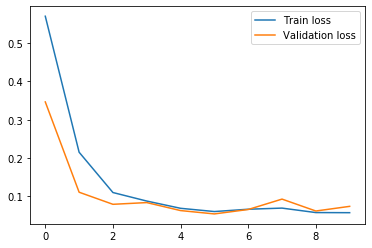

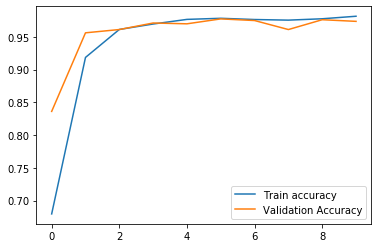

In [16]:
# Plotting Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# Plotting Accuracies
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [17]:
# saving the model
model.save('mask_detect.h5') 

So, finally we got the Accuracy score of 0.9800 and validation score of 0.9737 which is a good one to proceed further.

Now we load the saved model and get some predictions from them

In [18]:
from keras.models import load_model
from keras.preprocessing import image
import cv2

In [19]:
import numpy as np

In [20]:
model = load_model('mask_detect.h5')

In [21]:
# creating a function to predict image
def detect(frame):
    # resize image to req size and convert it to gray scale
    img=cv2.resize(frame,(100,100))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # convert imag eto array and scaling to 0-1 range
    img_pixels = image.img_to_array(img)
    img_pixels = np.expand_dims(img_pixels, axis = 0)
    img_pixels /= 255
    
    # predicting
    predictions = model.predict(img_pixels)
    ind = np.argmax(predictions[0])
    label=['WithMask','WithoutMask']
    print('Prediction:',predictions)
    return label[ind]

In [22]:
img=cv2.imread(r'D:\Project\mask\Validation\WithMask\40.png')

In [23]:
# calling the detect() function
detect(img)

Prediction: [[0.99056435 0.00943562]]


'WithMask'

In [24]:
# displaying the image using cv2
cv2.imshow('image',img)
cv2.waitKey()

-1